This notebook references the following tutorials:

* sampling random cell centers and associating knn locations
* tessellating with constant-size space cells
* tessellating with approximately the same number of locations per cell
* tessellating and segmenting with a sliding time window (NOT prepared for temporal regularization)
* tessellating and segmenting with a sliding time window (prepared for temporal regularization)

### Note:
The examples below call the low-level API and will soon be updated so that the higher-level `RWAnalyzer` API is called instead.

# Sampling random cell centers and associating knn locations

/home/flaurent/github/RWA-python/rwa/hdf5.py:185: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel # Panel has been flagged deprecated


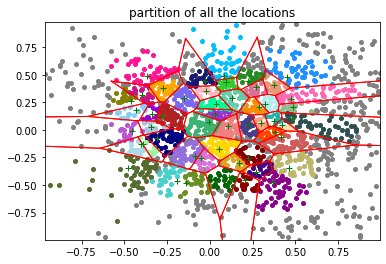

In [1]:

## key parameters
number_of_cells = 50
number_of_locations_per_cell = 50 # both min and max

## import
%matplotlib inline
from tramway.helper import *
from tutorial import load_default_trajectories
import numpy as np

## load the translocation data
trajectories = load_default_trajectories()
# explicit bounds are recommended here with box-less data generation
lower_bound, upper_bound = np.array((-0.5,-0.5)), np.array((0.5,0.5))

## tessellate
cells = tessellate(trajectories, 'random', cell_count=number_of_cells,
        lower_bound=lower_bound, upper_bound=upper_bound,
        # knn defines the minimum and maximum number of neighbours
        knn=(number_of_locations_per_cell, number_of_locations_per_cell))

## plot
cell_plot(cells, title='partition of all the locations')


gray dots are excluded.

see also command-line help:

    tramway tessellate random -h

# Tessellating with constant-size space cells

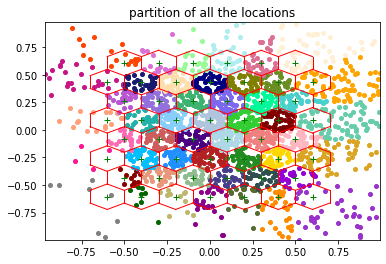

In [2]:

## key parameters
# average inter-cell distance or cell "diameter" in um
cell_size = 0.2

## import
%matplotlib inline
from tramway.helper import *
from tutorial import load_default_trajectories
import numpy as np

## load the translocation data
trajectories = load_default_trajectories()
# explicit bounds are recommended here with box-less data generation
lower_bound, upper_bound = np.array((-0.6,-0.6)), np.array((0.6,0.6))

## tessellate
cells = tessellate(trajectories, 'hexagon',
        # the inter-cell distance is 2*ref_distance
        ref_distance=cell_size/2,
        # discard the criterion on the minimum number of locations per cell
        min_location_count=0,
        lower_bound=lower_bound, upper_bound=upper_bound)

## plot
cell_plot(cells, title='partition of all the locations')


see also command-line help:
    
    tramway tessellate hexagon -h

# Tessellating with approximately the same number of locations per cell

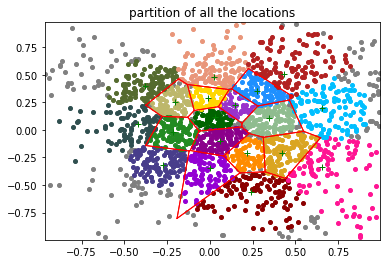

In [3]:

# WARNING! This takes time.

## key parameters
# average number of locations per cell
location_count = 100
# relative margin on the number of locations per cell
count_margin = 0.1 # 10%

## import
%matplotlib inline
from tramway.helper import *
from tutorial import load_default_trajectories

## load the translocation data
trajectories = load_default_trajectories()

## tessellate
cells = tessellate(trajectories, 'kohonen', avg_location_count=location_count,
        # use knn to control the range of variation in the location count
        knn=(round(location_count*(1.-count_margin)), round(location_count*(1.+count_margin))))

## plot
cell_plot(cells, title='partition of all the locations')


gray dots are excluded.

see also command-line help:

    tramway tessellate kohonen -h

# Tessellating and segmenting with a sliding time window (NOT prepared for temporal regularization)

example segment: 4


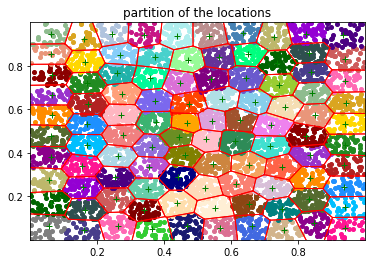

In [4]:

## key parameters
# window duration in s
window_duration = 1.
# window overlap
window_overlap = 0.5 # 50%

## import
%matplotlib inline
from tramway.helper import *
from tutorial import load_default_trajectories

## load the translocation data
trajectories = load_default_trajectories(time_varying_properties=True)

## segment
cells = tessellate(trajectories, 'kmeans', prune=False, time_window_duration=window_duration,
        time_window_shift=window_duration*(1.-window_overlap))

## plot a single segment
segment_index = 4 # ranges from 0
print('example segment: {}'.format(segment_index))
cell_plot(cells, segment=segment_index, title='partition of the locations')


### notes:
Any spatial tessellation algorithm can be substituted to *kmeans*.
Argument `prune` is kmeans-specific.

# Tessellating and segmenting with a sliding time window (prepared for temporal regularization)

example segment: 4


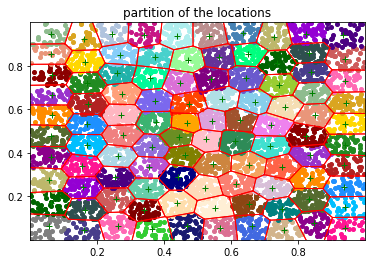

In [5]:

## key parameters.txt'
# window duration in s
window_duration = 1.
# window overlap
window_overlap = 0.5 # 50%

## import
%matplotlib inline
from tramway.helper import *
from tutorial import load_default_trajectories

## load the translocation data
trajectories = load_default_trajectories(time_varying_properties=True)

## segment
cells = tessellate(trajectories, 'kmeans', prune=False, time_window_duration=window_duration,
        time_window_shift=window_duration*(1.-window_overlap),
        time_window_options=dict(time__default_trajdimension=True))

## plot a single segment
segment_index = 4 # ranges from 0
print('example segment: {}'.format(segment_index))
cell_plot(cells, segment=segment_index, title='partition of the locations')


### notes:
Any spatial tessellation algorithm can be substituted to *kmeans*.
Argument `prune` is kmeans-specific.